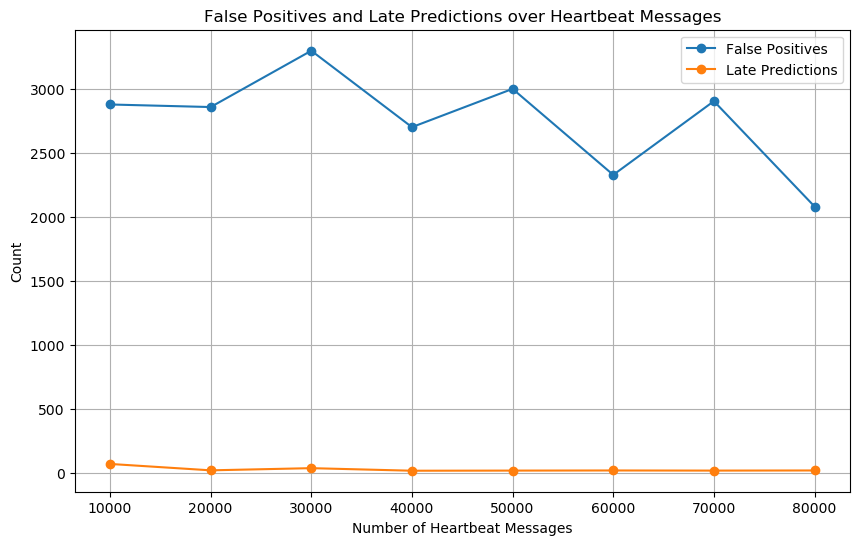

In [1]:
import matplotlib.pyplot as plt

# Data
data = {
    "false_positives": [2879, 2859, 3299, 2702, 3001, 2329, 2905, 2082],
    "late_predictions": [71, 21, 38, 18, 19, 20, 19, 20]
}

# Number of Heartbeat Messages (x-axis)
heartbeat_messages = [10000 * i for i in range(1, len(data["false_positives"]) + 1)]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(heartbeat_messages, data["false_positives"], marker='o', label='False Positives')
plt.plot(heartbeat_messages, data["late_predictions"], marker='o', label='Late Predictions')
plt.xlabel('Number of Heartbeat Messages')
plt.ylabel('Count')
plt.title('False Positives and Late Predictions over Heartbeat Messages')
plt.legend()
plt.grid(True)
plt.show()


Clock Cycles (Scaled): [68.140304, 67.006345, 68.750059, 67.365446, 66.485405, 63.612095, 66.69193, 65.868731, 76.280241, 69.308716, 68.534466, 67.814735, 69.506488, 68.83878, 70.231289, 70.526526, 70.028913, 70.659407, 70.856807, 70.502157, 71.916419, 69.526601, 69.562067, 67.717551, 68.60177, 67.552119, 71.108513, 70.42574, 69.933164, 67.138639, 68.966677, 68.479802, 69.447879, 70.012064, 72.828658, 68.735533, 69.278585, 66.597158, 67.460525, 68.040629, 65.852915, 68.712792, 70.790487, 67.411584, 70.075875, 67.356883, 69.438343, 69.920827, 66.752569, 68.287583, 69.80106, 70.145196, 69.263771, 66.695643, 70.332116, 68.916859, 69.336314, 69.618326, 70.260015, 71.274829, 68.88295, 70.12208, 70.000206, 72.711619, 69.994263, 69.854661, 71.344265, 70.123119, 71.466369, 69.464496, 70.213052, 69.827722, 69.933722, 70.092146, 70.515839, 69.972693, 68.064123, 70.325577, 68.881429, 68.113286, 77.353007, 69.51606, 71.769623, 69.242033, 70.536245, 69.189372, 70.096497, 67.73511, 67.340861, 68.566

Average of clock cycles: 69.92487949896918 ms
Standard deviation of clock cycles: 7.102664293448351 ms


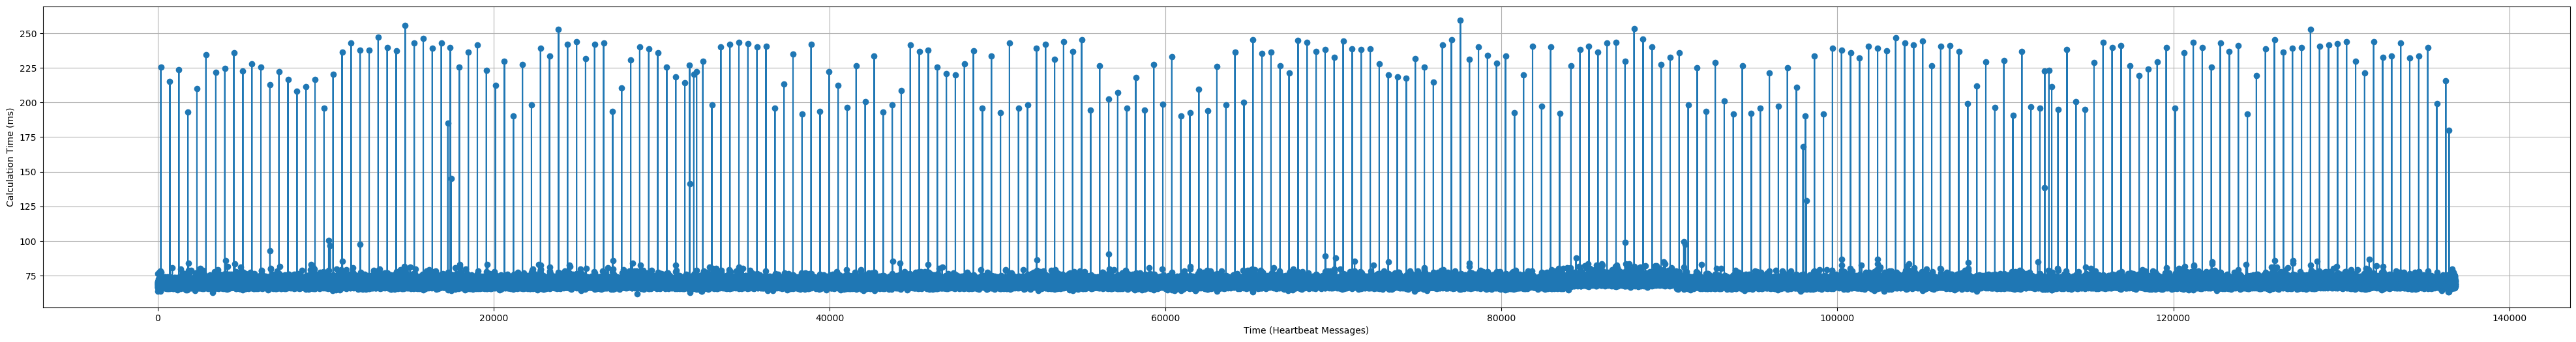

259.464782


In [2]:
import matplotlib.pyplot as plt
import statistics

# Function to process data between the first and second "*******************New Run*******************" markers
def process_data_between_markers(lines):
    data = {"time": [], "clock_cycles": []}
    marker_count = 0

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 2:
                break
        elif marker_count == 1:
            try:
                clock_cycles = int(line.strip())
                data["clock_cycles"].append(clock_cycles / 2000000)
            except ValueError:
                pass

    # Calculate the time values based on the number of heartbeat messages (assuming 1 heartbeat message per data point)
    data["time"] = list(range(1, len(data["clock_cycles"]) + 1))
    return data

# Read data from the file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(50, 6))
    plt.plot(data["time"], data["clock_cycles"], marker='o')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Calculation Time (ms)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "computation_time.txt"  # Replace with the path to your text file
    lines = read_data_from_file(file_path)
    data = process_data_between_markers(lines)
    print("Clock Cycles (Scaled):", data["clock_cycles"])
    print("Time (Heartbeat Messages):", data["time"])
        
    # Count and remove clock cycles above 300
    if data["clock_cycles"]:
        count_above_300 = sum(1 for cycle in data["clock_cycles"] if cycle > 300)
        data["clock_cycles"] = [cycle for cycle in data["clock_cycles"] if cycle <= 300]
    if data["time"]:
        for i in range(count_above_300):
            data["time"].pop()
            
    # Calculate the average and standard deviation of clock cycles
    if data["clock_cycles"]:
        average_cycles = statistics.mean(data["clock_cycles"])
        std_dev_cycles = statistics.stdev(data["clock_cycles"])

    print("Average of clock cycles:", average_cycles, "ms")
    print("Standard deviation of clock cycles:", std_dev_cycles, "ms")
    
    
    plot_line_chart(data)
    print(max(data["clock_cycles"]))


Processed Data: {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000], 'false_positives': [360, 294, 377, 404, 410, 456, 445, 408, 386, 394, 412, 330, 451, 441, 439, 429]}


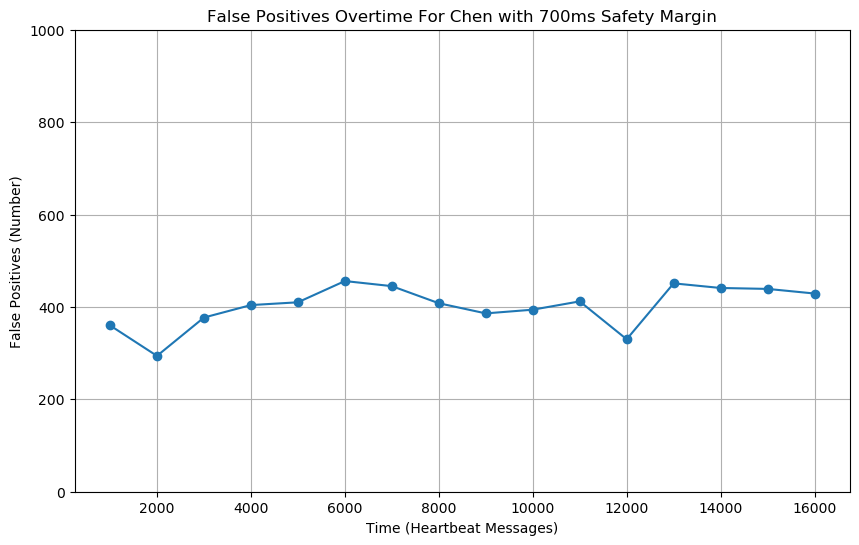

In [3]:
import matplotlib.pyplot as plt
# Function to process data between the first and second "*******************New Run*******************" markers
def process_data_between_markers(lines):
    data = {"time": [], "false_positives": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 2:
                break
        elif marker_count == 1 and line.strip().startswith("false_positives: "):
            try:
                cnt = int(line.strip().split(": ")[1])
                data["false_positives"].append(cnt)
                heartbeat_count += 1
                data["time"].append(interval * heartbeat_count)
            except (ValueError, IndexError):
                pass

    return data

# Read data from the file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('False Positives (Number)')
    plt.title('False Positives Overtime For Chen with 700ms Safety Margin')
    plt.grid(True)
    
    # Set the y-axis limits to (0, 1000)
    plt.ylim(0, 1000)
    plt.show()

if __name__ == "__main__":
    file_path = "../../chen_eval/output/general_stats.txt"  # Replace with the path to your text file
    lines = read_data_from_file(file_path)
    data = process_data_between_markers(lines)

    print("Processed Data:", data)
    plot_line_chart(data)


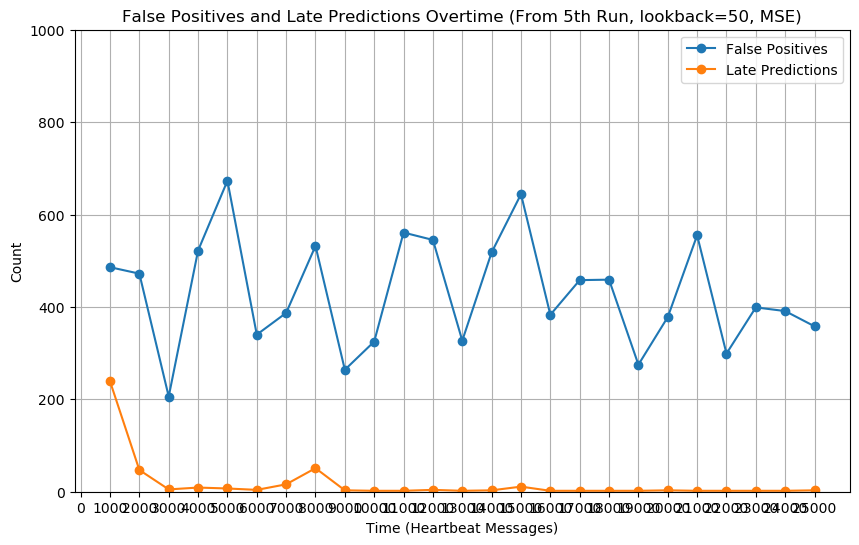

In [30]:
import matplotlib.pyplot as plt

# Function to process data starting from the 5th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 5:
                start_processing = True
                continue
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 5th Run, lookback=50, MSE)')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


In [ ]:
import matplotlib.pyplot as plt

# Function to process data starting from the 5th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 6:
                start_processing = True
                continue
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 5th Run, lookback=50, MSE)')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


chen fd analysis result

Processed Data: {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000], 'false_positives': [0, 0, 0, 0, 0, 0, 0]}


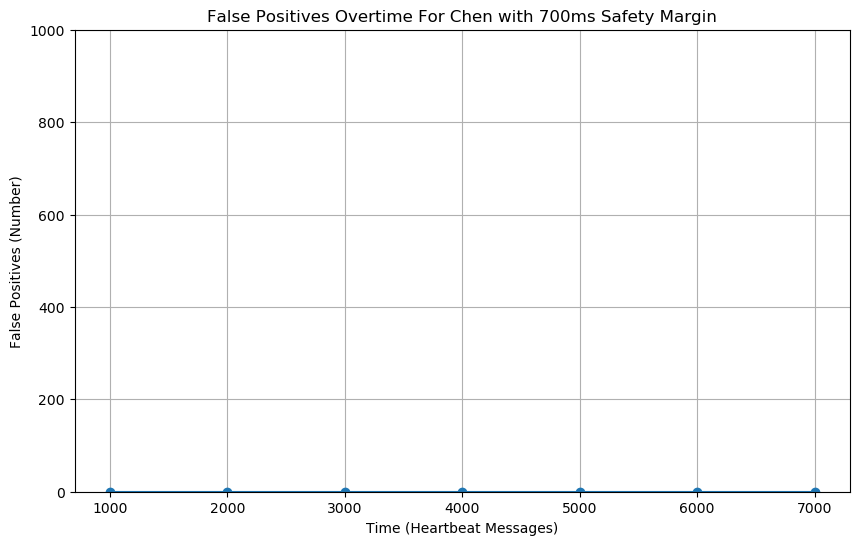

In [3]:
import matplotlib.pyplot as plt
# Function to process data between the first and second "*******************New Run*******************" markers
def process_data_between_markers(lines):
    data = {"time": [], "false_positives": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 2:
                start_processing = True
                continue
            if marker_count == 3:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    cnt = int(line.strip().split(": ")[1])
                    data["false_positives"].append(cnt)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass

    return data

# Read data from the file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('False Positives (Number)')
    plt.title('False Positives Overtime For Chen with 700ms Safety Margin')
    plt.grid(True)
    
    # Set the y-axis limits to (0, 1000)
    plt.ylim(0, 1000)
    plt.show()

if __name__ == "__main__":
    file_path = "../../chen_eval/output/general_stats.txt"  # Replace with the path to your text file
    lines = read_data_from_file(file_path)
    data = process_data_between_markers(lines)

    print("Processed Data:", data)
    plot_line_chart(data)


Processed Data: [{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000], 'false_positives': [360, 294, 377, 404, 410, 456, 445, 408, 386, 394, 412, 330, 451, 441, 439, 429], 'parameters': 'n = 50, safety margin = 700ms'}, {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000], 'false_positives': [0, 0, 0, 0, 0, 0, 0], 'parameters': 'n = 5, safety margin = 700ms'}, {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000], 'false_positives': [18, 21, 22, 24, 35, 32, 25, 21, 19], 'parameters': 'n = 5, safety margin = 100ms'}, {'time': [1000, 2000, 3000, 4000, 5000, 6000], 'false_positives': [924, 919, 959, 933, 953, 899], 'parameters': 'n = 20, safety margin = 100ms'}, {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000], 'false_positives': [505, 513, 520, 556, 570, 518, 542, 516, 417, 247, 489, 559, 566, 504], 'parameters': 'n = 20, safety margin = 200ms'}, {'time': [1000, 2000, 30

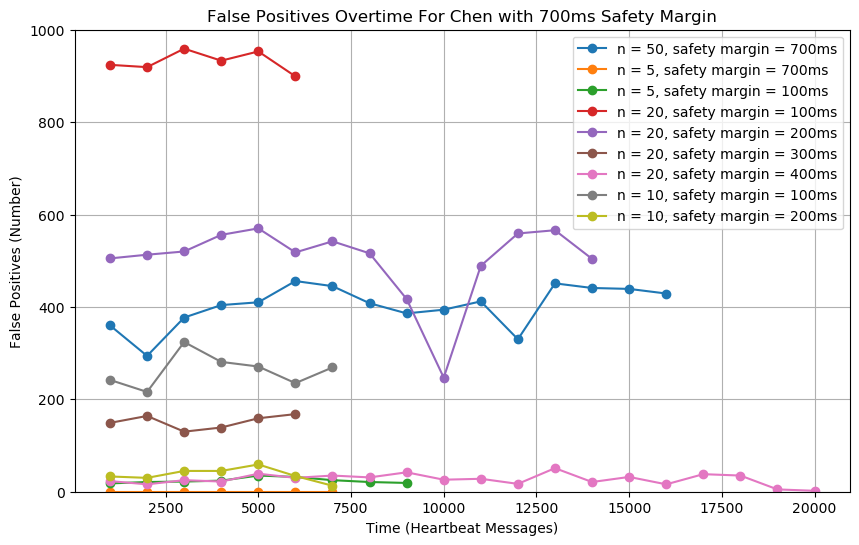

In [2]:
import matplotlib.pyplot as plt

# Function to process data between the "New Run" markers
def process_data_between_markers(lines):
    data_list = []
    interval = 1000  # X-axis interval for heartbeat messages

    current_data = {"time": [], "false_positives": []}

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            if current_data["time"] and current_data["false_positives"]:
                data_list.append(current_data)
                current_data = {"time": [], "false_positives": [], "parameters": ""}
            continue
        
        if line.strip().startswith("n = "):
            current_data["parameters"] = line.strip()
            

        if line.strip().startswith("false_positives: "):
            try:
                cnt = int(line.strip().split(": ")[1])
                current_data["false_positives"].append(cnt)
                current_data["time"].append(interval * len(current_data["false_positives"]))
            except (ValueError, IndexError):
                pass

    if current_data["time"] and current_data["false_positives"]:
        data_list.append(current_data)

    return data_list

# Read data from the file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Main function to plot the line chart
def plot_line_chart(data_list):
    plt.figure(figsize=(10, 6))

    for i, data in enumerate(data_list):
        plt.plot(data["time"], data["false_positives"], marker='o', label=data["parameters"])

    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('False Positives (Number)')
    plt.title('False Positives Overtime For Chen with 700ms Safety Margin')
    plt.grid(True)
    plt.legend()
    
    # Set the y-axis limits to (0, 1000)
    plt.ylim(0, 1000)
    plt.show()

if __name__ == "__main__":
    file_path = "../../chen_eval/output/general_stats.txt"  # Replace with the path to your text file
    lines = read_data_from_file(file_path)
    data_list = process_data_between_markers(lines)

    print("Processed Data:", data_list)
    plot_line_chart(data_list)


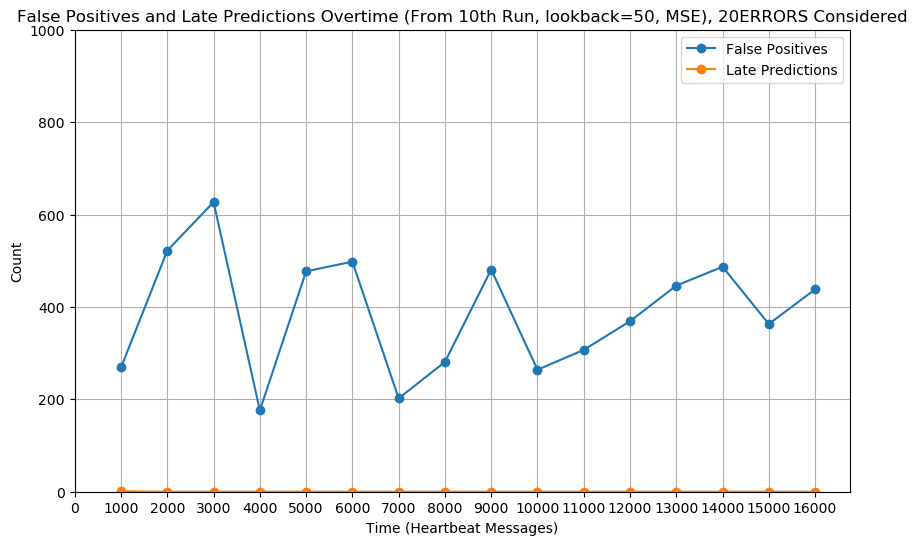

In [2]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 10:
                start_processing = True
                continue
            if marker_count > 10:
                break
            

        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 10th Run, lookback=50, MSE), 20ERRORS Considered')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


the lare_prediction count is inaccurate because I forget to add it correclty!

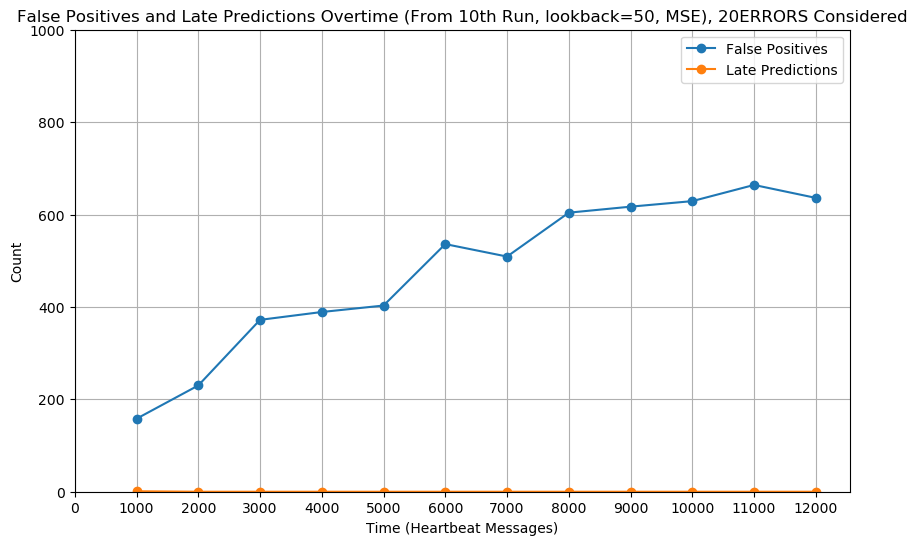

In [23]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 11:
                start_processing = True
                continue
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 10th Run, lookback=50, MSE), 20ERRORS Considered, only update the model when it performs worse that the last N heartbeats, which means that the situation has changed, and we probably need a new model')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


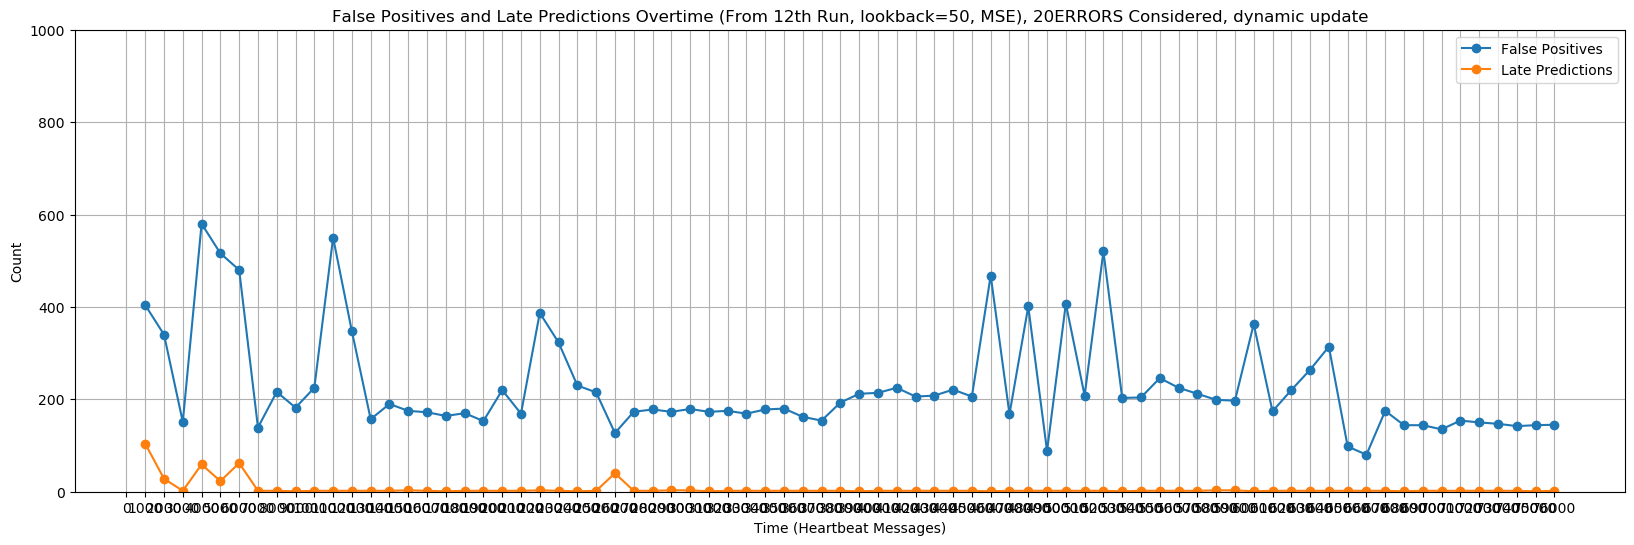

In [1]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 12:
                start_processing = True
                continue
            if marker_count > 12:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 12th Run, lookback=50, MSE), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


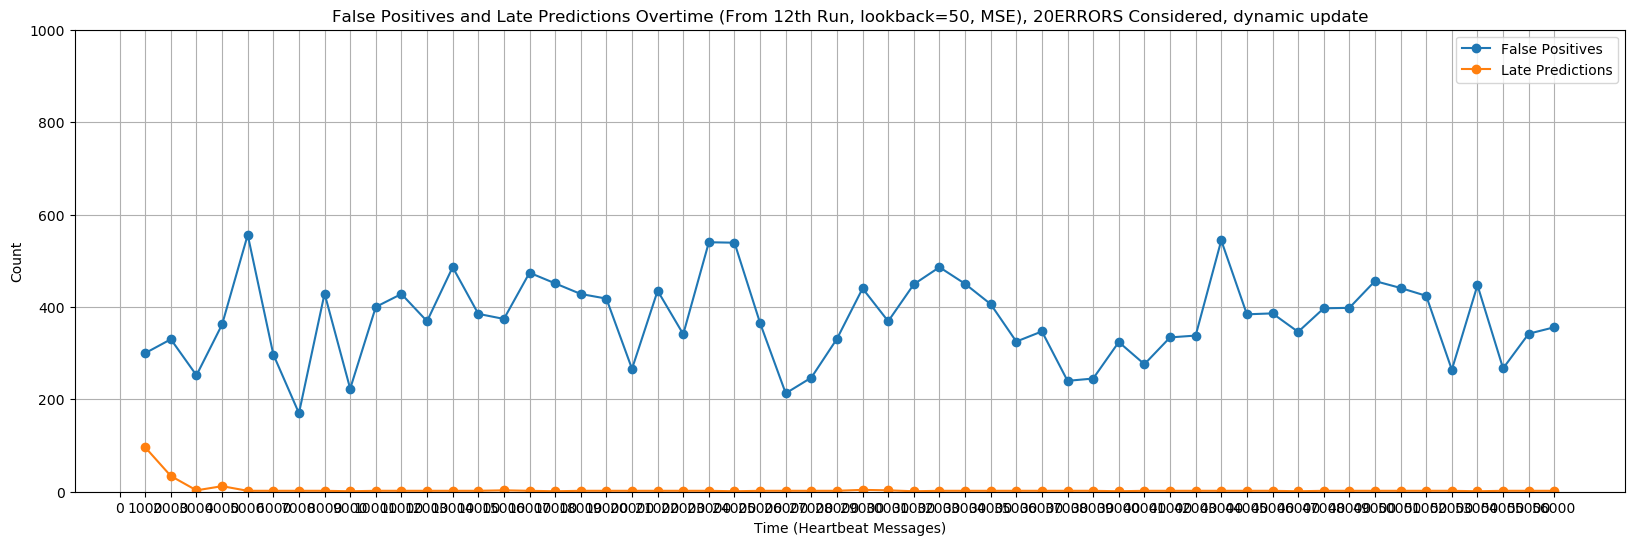

In [2]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 13:
                start_processing = True
                continue
            if marker_count > 13:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 12th Run, lookback=50, MSE), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


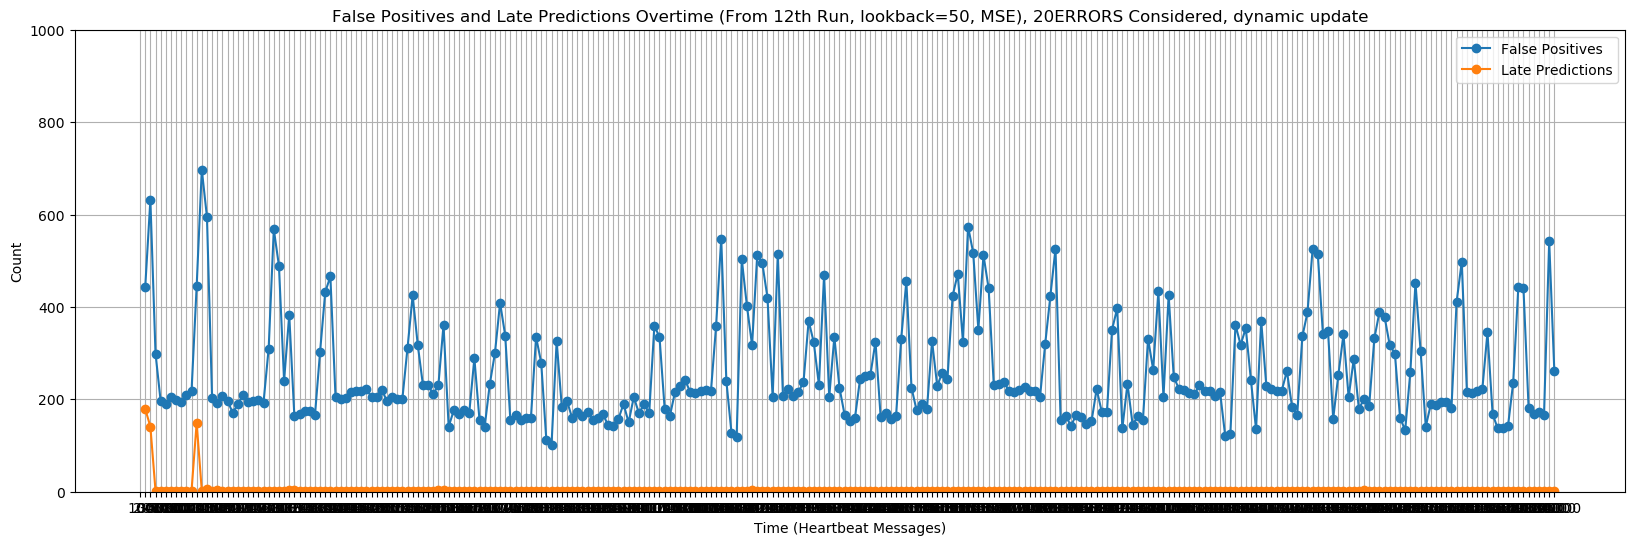

In [3]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 14:
                start_processing = True
                continue
            if marker_count > 14:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 12th Run, lookback=50, MSE), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


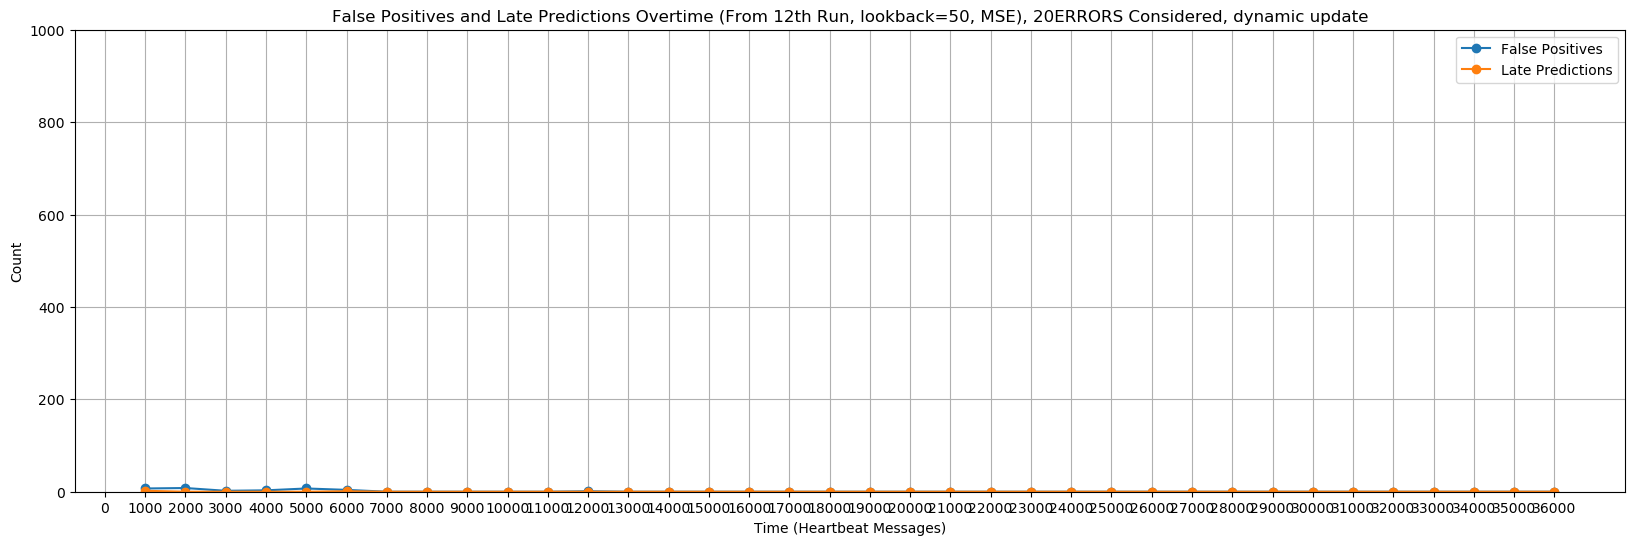

In [4]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 15:
                start_processing = True
                continue
            if marker_count > 15:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 12th Run, lookback=50, MSE), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


Average False positives:  0.07758620689655173


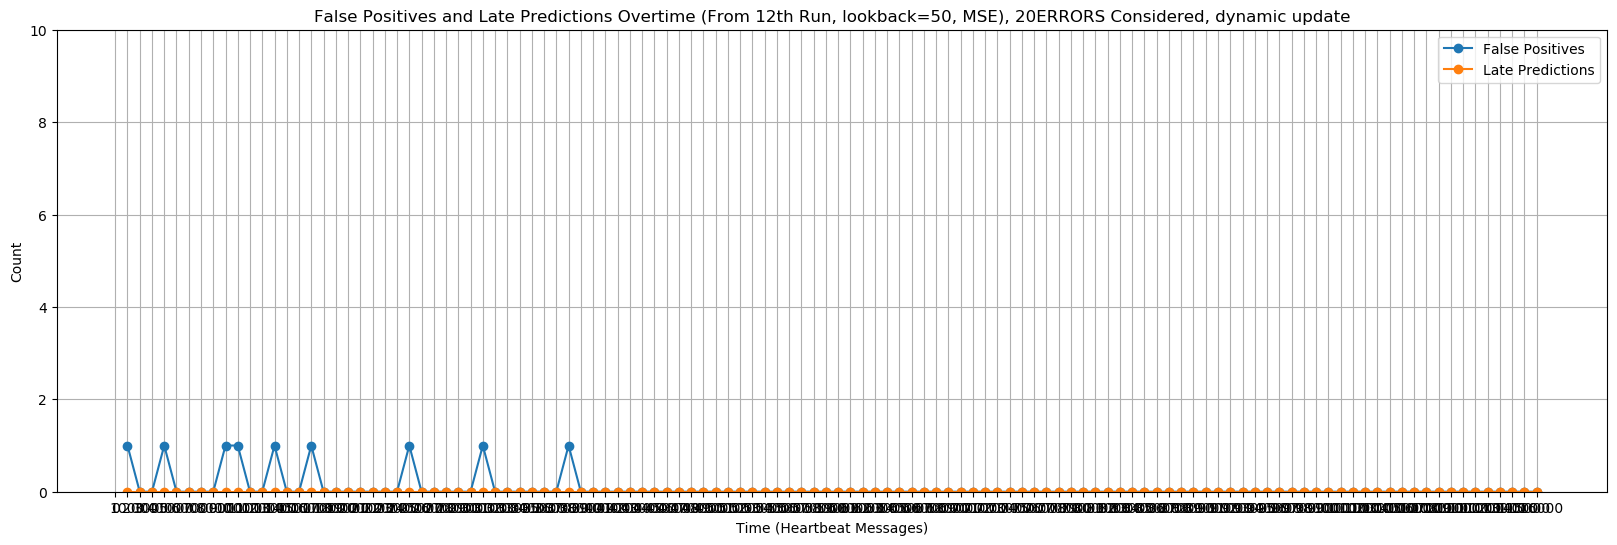

In [19]:
import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 16:
                start_processing = True
                continue
            if marker_count > 16:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 12th Run, lookback=50, MSE), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 10)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


Average False positives:  1.5454545454545454


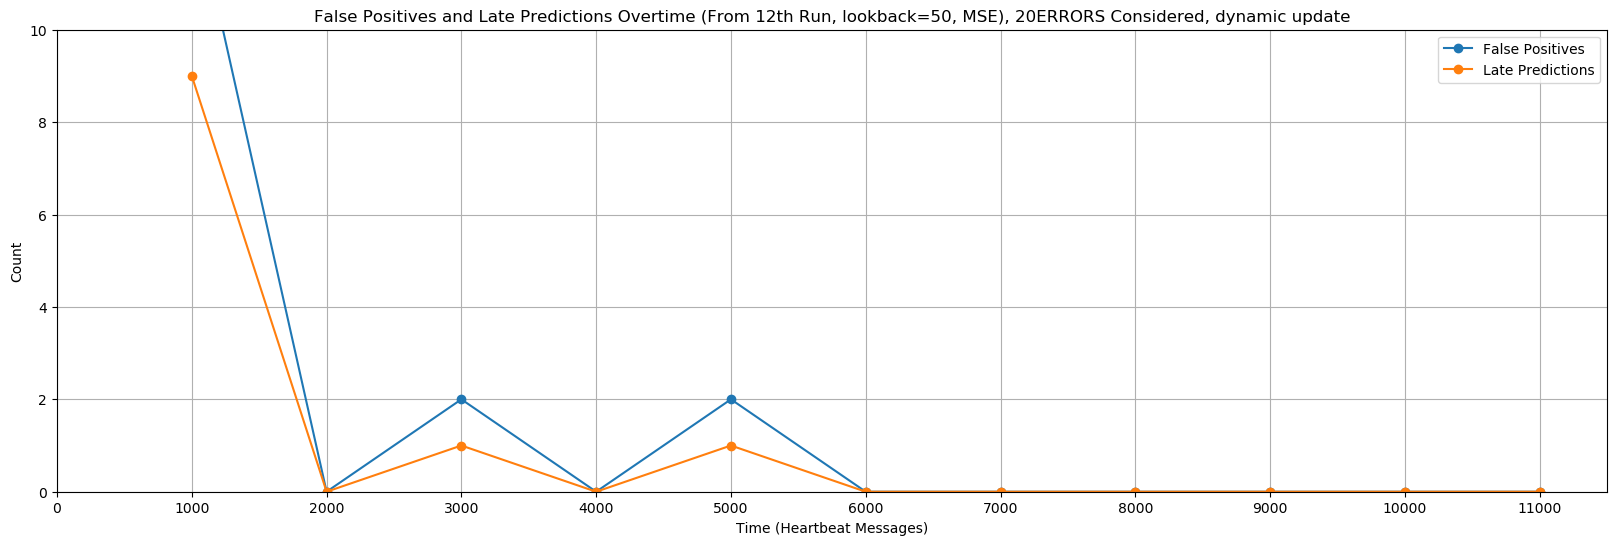

In [3]:
import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 17:
                start_processing = True
                continue
            if marker_count > 17:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 12th Run, lookback=50, MSE), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 10)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


Average False positives:  7.666666666666667


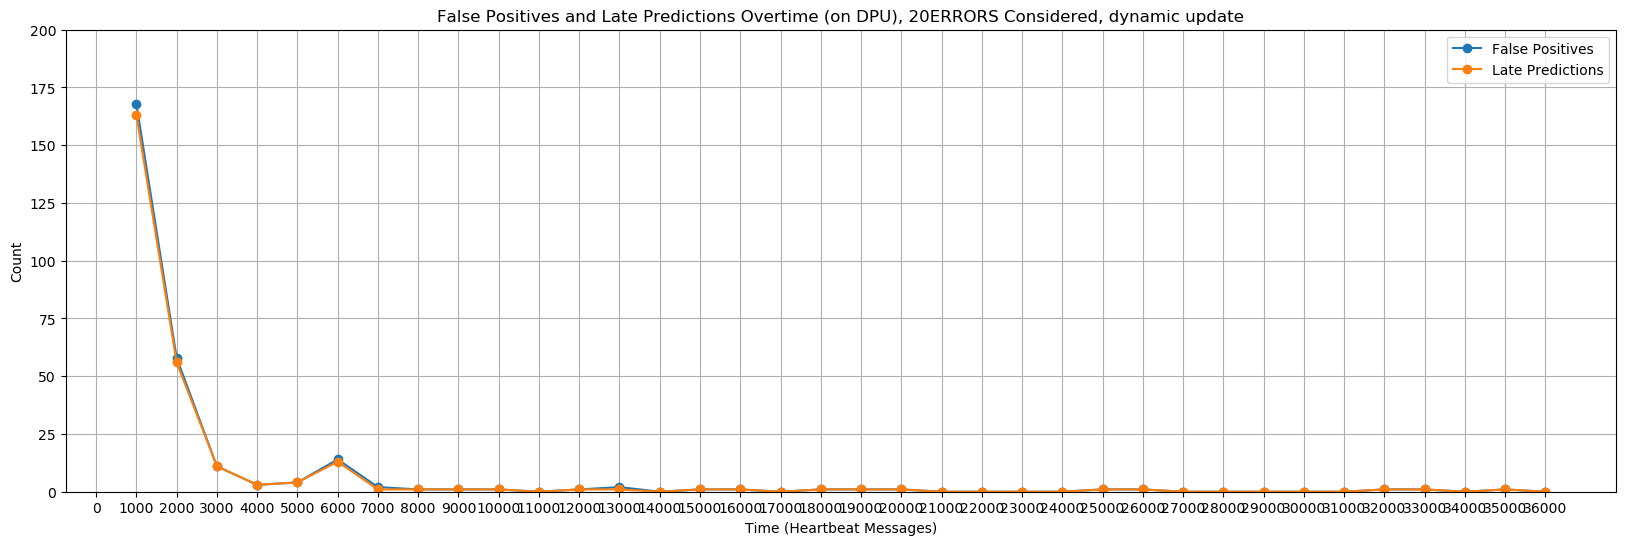

In [4]:
import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 30:
                start_processing = True
                continue
            if marker_count > 30:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on DPU), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


writing code for visualization of the paper

{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000], 'false_positives': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0], 'late_predictions': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19]}


ValueError: x and y must have same first dimension, but have shapes (30,) and (29,)

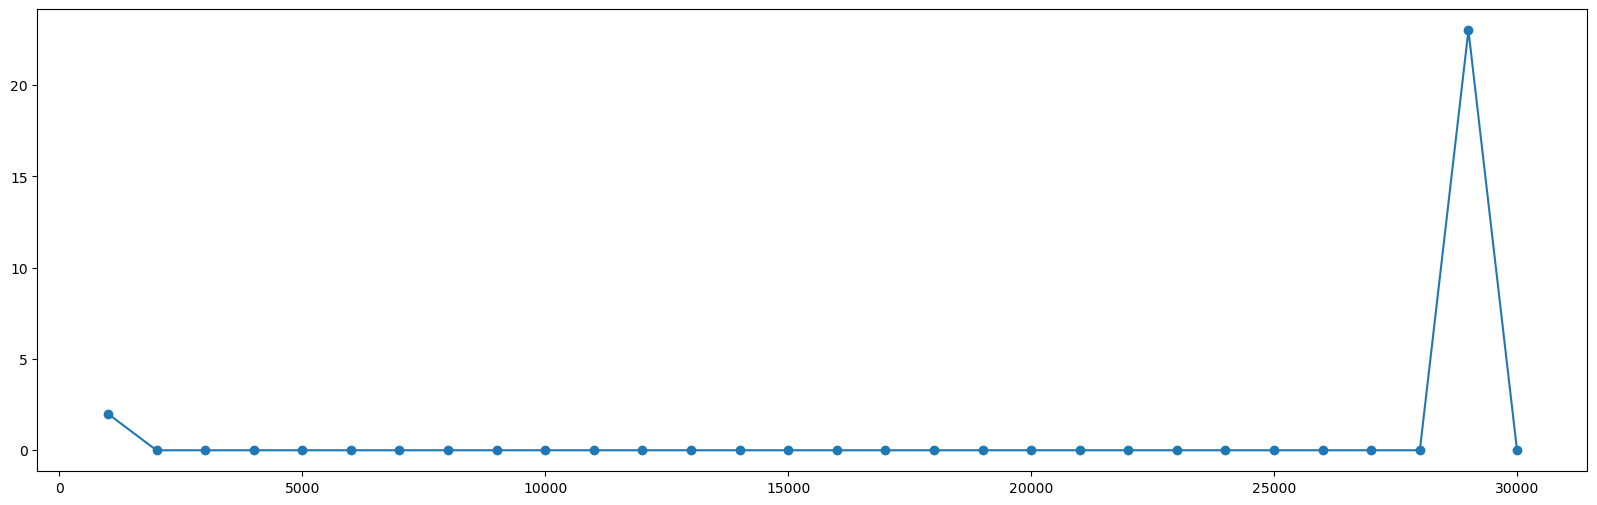

In [55]:
import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines, num):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == num:
                start_processing = True
                continue
            if marker_count > num:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
            if len(data["time"]) == 30:
                break
    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 12th Run, lookback=50, MSE), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    data = process_data_from_5th_run(lines, 38)
    
    print(data)
    
    bertier_file_path = "../../bertier/output/general_stats.txt"
    
    with open(bertier_file_path, 'r') as file:
        bertier_lines = file.readlines()
    
    new_data = process_data_from_5th_run(bertier_lines, 6)
    
    # print(new_data)
    
    # plot_line_chart(data)
    # plot_line_chart(new_data)

    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.plot(new_data["time"], new_data["false_positives"], marker='^', label='False Positives (Bertier)')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('Bertier False Positive running on Planet Lab Traces (Host)')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 50)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(new_data["time"]) + 1, 1000))
    
    bertier_average = statistics.mean(new_data["false_positives"])
    print(bertier_average)

    
    
    plt.show()


2778
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000], 'false_positives': [9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'late_predictions': [7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Average False positives:  0.75
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 10800

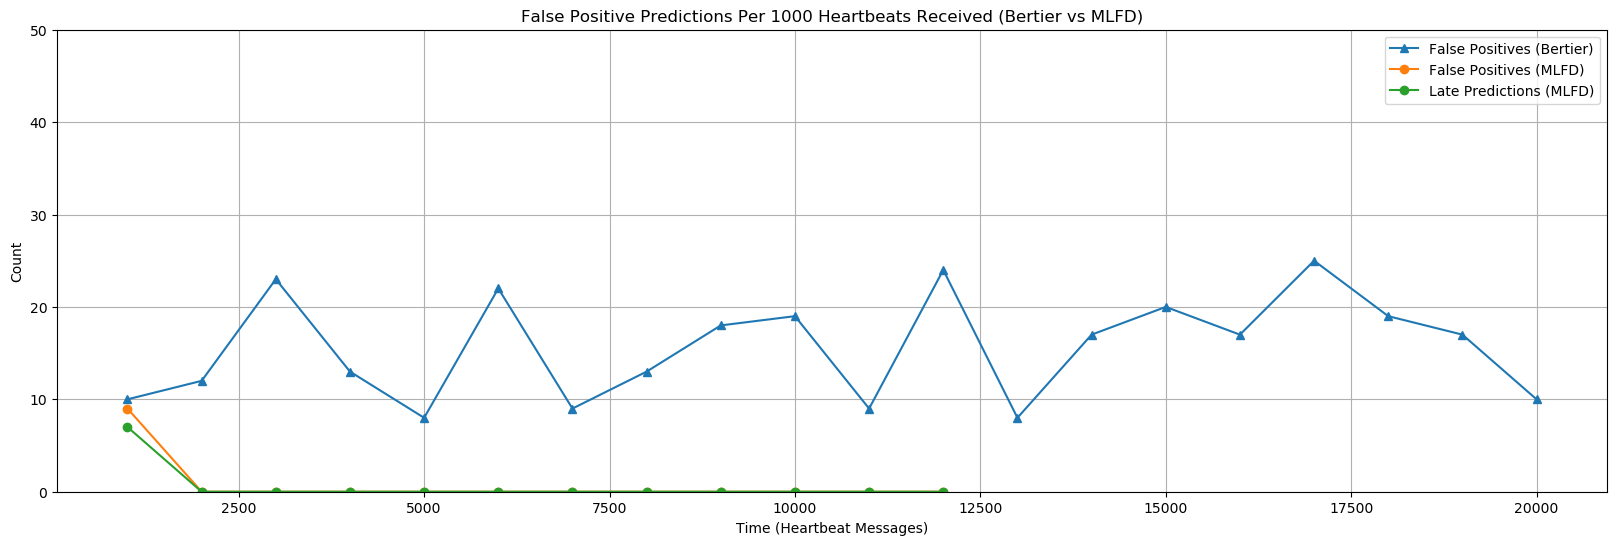

In [77]:
import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines, num):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == num:
                start_processing = True
                continue
            if marker_count > num:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
        
    print(data)
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on DPU), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        print(len(lines))

    data = process_data_from_5th_run(lines, 42)
    
    with open(bertier_file_path, 'r') as file:
        bertier_lines = file.readlines()
    
    new_data = process_data_from_5th_run(bertier_lines, 6)
    
    
    plt.figure(figsize=(20, 6))
    plt.plot(new_data["time"][:20], new_data["false_positives"][:20], marker='^', label='False Positives (Bertier)')
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives (MLFD)')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions (MLFD)')
    plt.plot
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positive Predictions Per 1000 Heartbeats Received (Bertier vs MLFD)')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 50)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()


Average False positives:  0.09734513274336283
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000], 'false_positives': [5, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

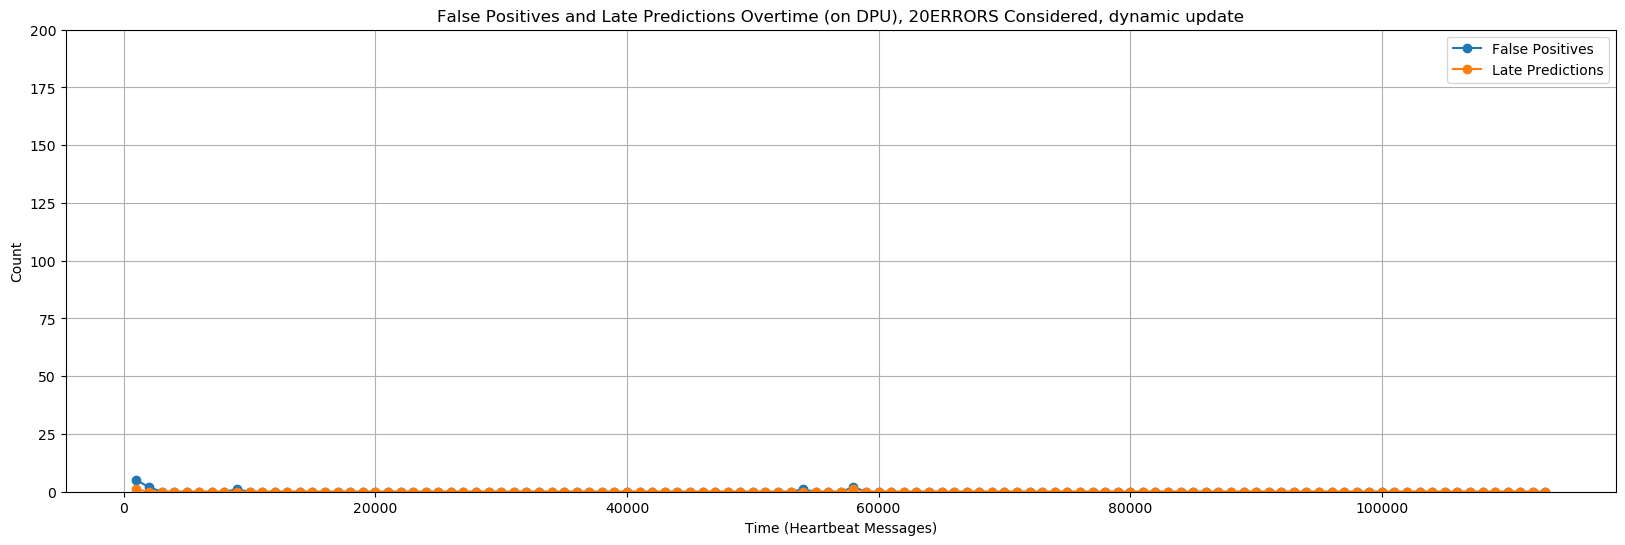

In [79]:
# this is mlfd run on the host with simulations 

import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == 45:
                start_processing = True
                continue
            if marker_count > 45:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on DPU), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    print(data)
    plot_line_chart(data)


Average False positives:  14.222222222222221
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000], 'false_positives': [7, 18, 30, 20, 14, 9, 41, 8, 8, 11, 11, 13, 6, 18, 12, 12, 3, 15], 'late_predictions': [5, 7, 8, 7, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2]}


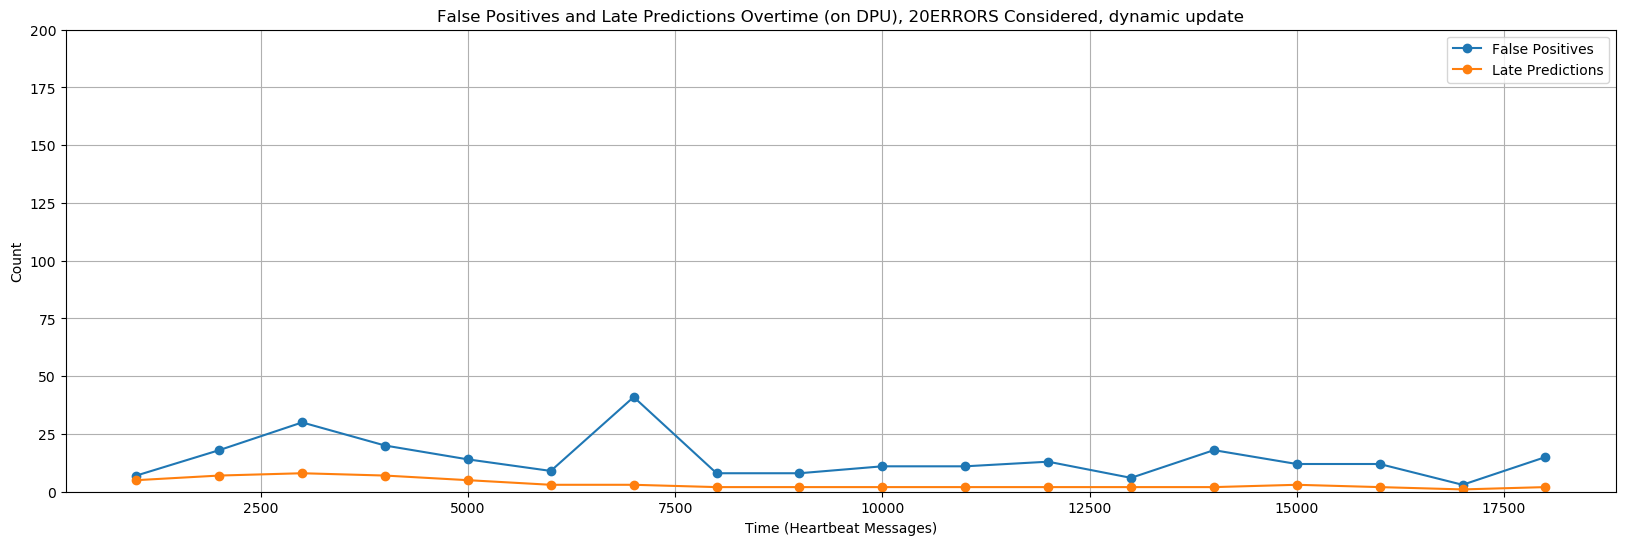

In [4]:
# this is mlfd run on the host with simulations 

import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == 54:
                start_processing = True
                continue
            if marker_count > 54:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on DPU), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    print(data)
    plot_line_chart(data)


Average False positives:  7.4375
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000], 'false_positives': [14, 2, 5, 19, 13, 12, 23, 6, 10, 13, 11, 6, 6, 10, 8, 7, 0, 4, 6, 8, 4, 7, 9, 2, 4, 4, 2, 2, 2, 2, 1, 16], 'late_predictions': [11, 1, 3, 11, 8, 6, 10, 2, 4, 5, 4, 2, 2, 2, 3, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2]}


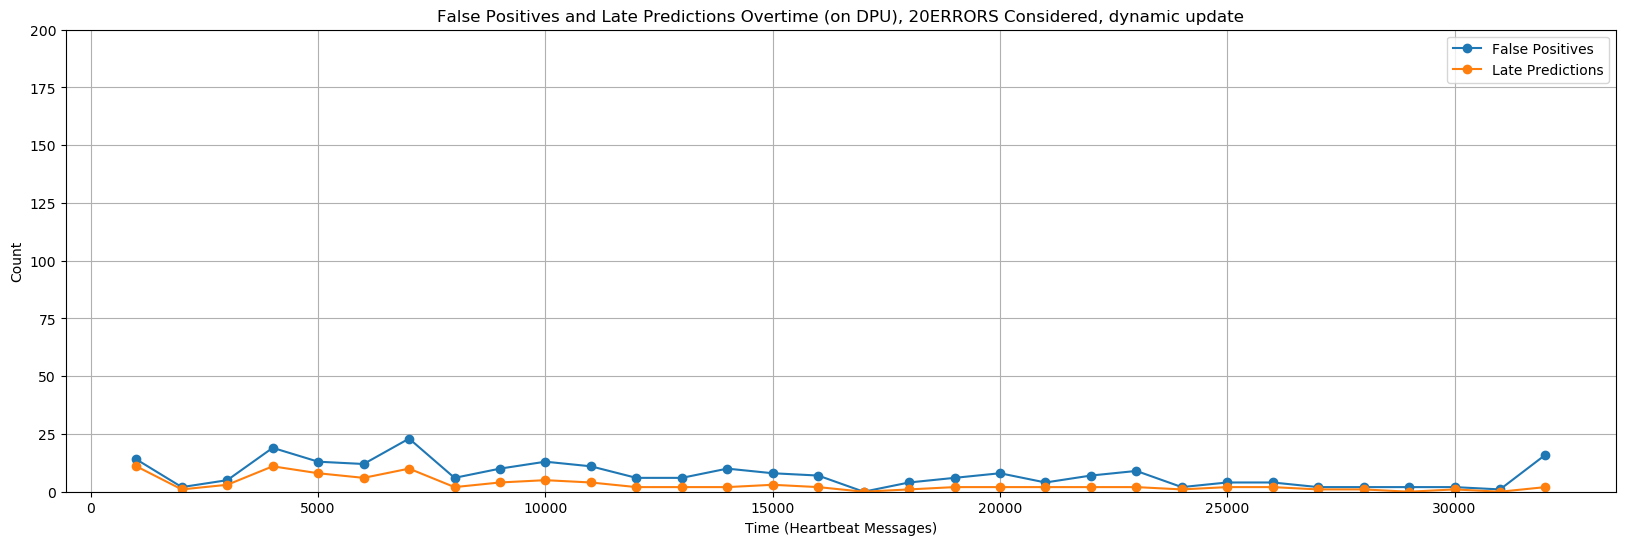

In [5]:
# this is mlfd run on the host with simulations 

import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == 55:
                start_processing = True
                continue
            if marker_count > 55:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on DPU), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    print(data)
    plot_line_chart(data)


Average False positives:  50.375
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000], 'false_positives': [26, 28, 87, 53, 14, 194, 41, 46, 29, 23, 73, 31, 65, 60, 17, 19], 'late_predictions': [22, 8, 7, 7, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2]}


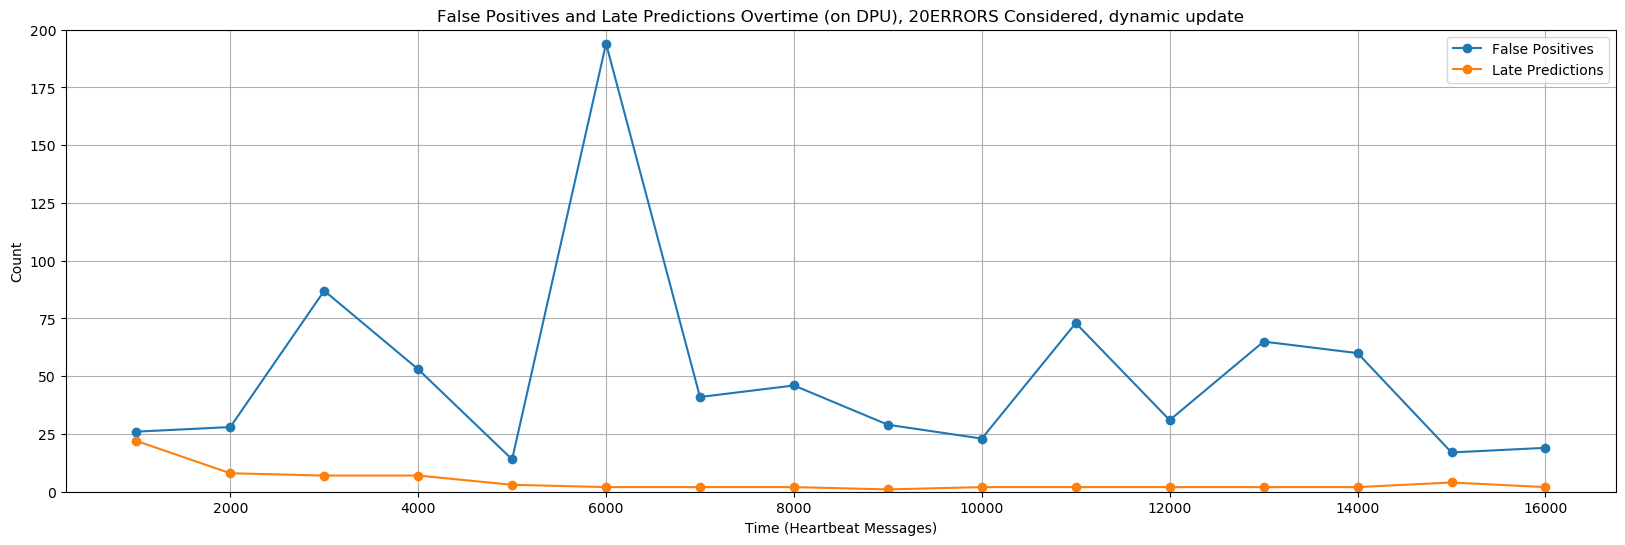

In [1]:
# this is mlfd run on the host with simulations 

import matplotlib.pyplot as plt
import statistics

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == 56:
                start_processing = True
                continue
            if marker_count > 56:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on DPU), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    print(data)
    plot_line_chart(data)


Average False positives:  39.35083532219571
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000

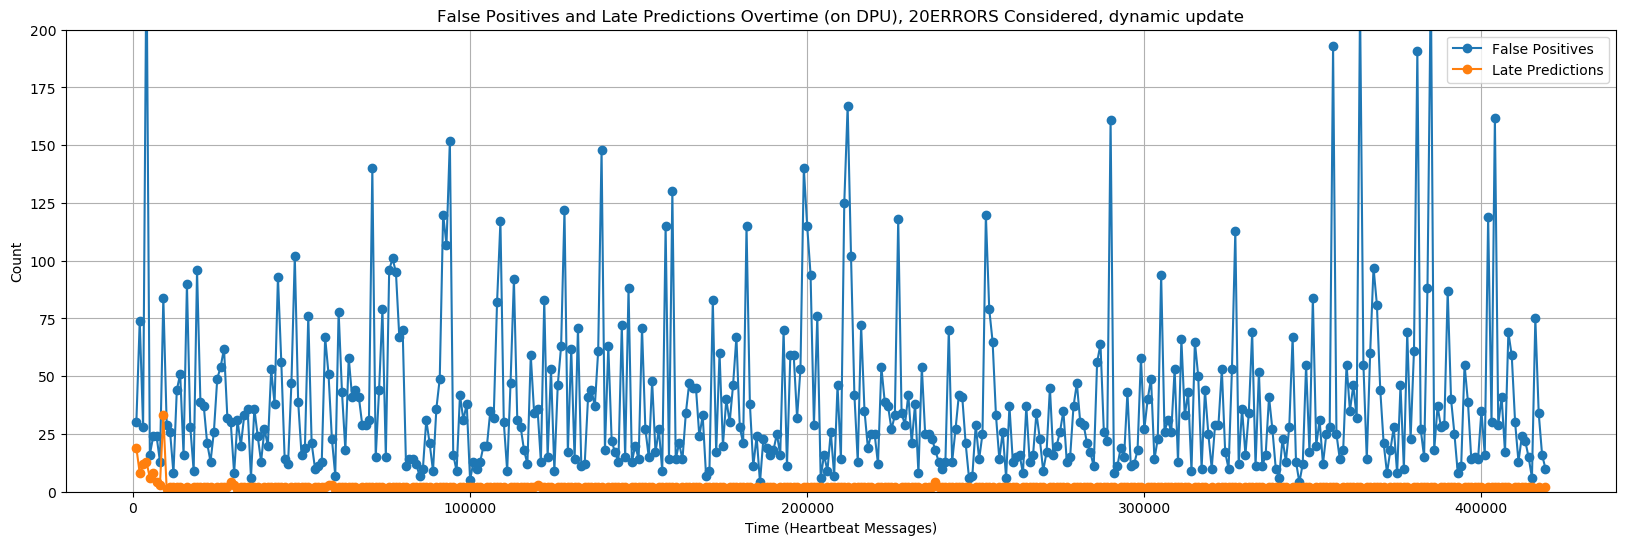

2.090692124105012


In [3]:
# this is mlfd run on the host with simulations 

import matplotlib.pyplot as plt
import statistics
import numpy as np

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == 58:
                start_processing = True
                continue
            if marker_count > 58:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on DPU), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    print(data)
    plot_line_chart(data)
    print(np.mean(data["late_predictions"]))


Average False positives:  25.25055928411633
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000

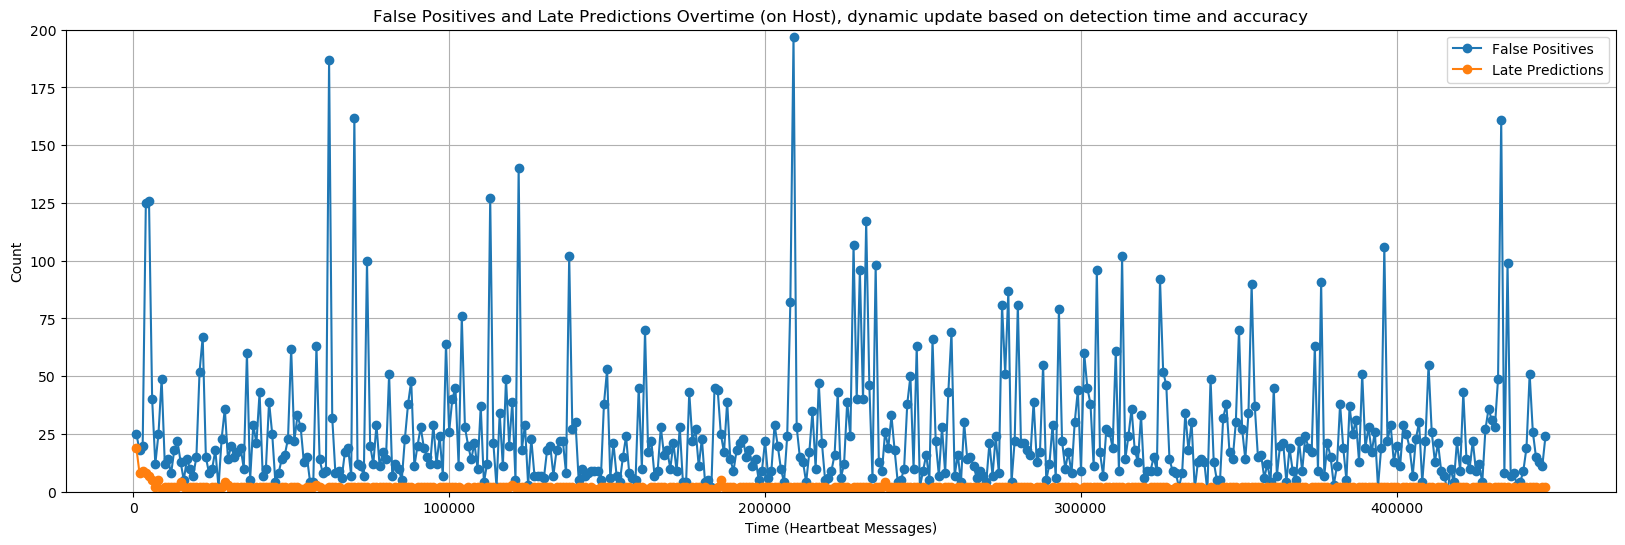

1.9105145413870246


In [1]:
# this is mlfd run on the host with simulations 

import matplotlib.pyplot as plt
import statistics
import numpy as np

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == 61:
                start_processing = True
                continue
            if marker_count > 61:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on Host), dynamic update based on detection time and accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    print(data)
    plot_line_chart(data)
    print(np.mean(data["late_predictions"]))


The diagram above shows the false positive and late prediction of dynamically updating only when the detection time OR accuracy is worse. 


Average False positives:  5.919444444444444
{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000

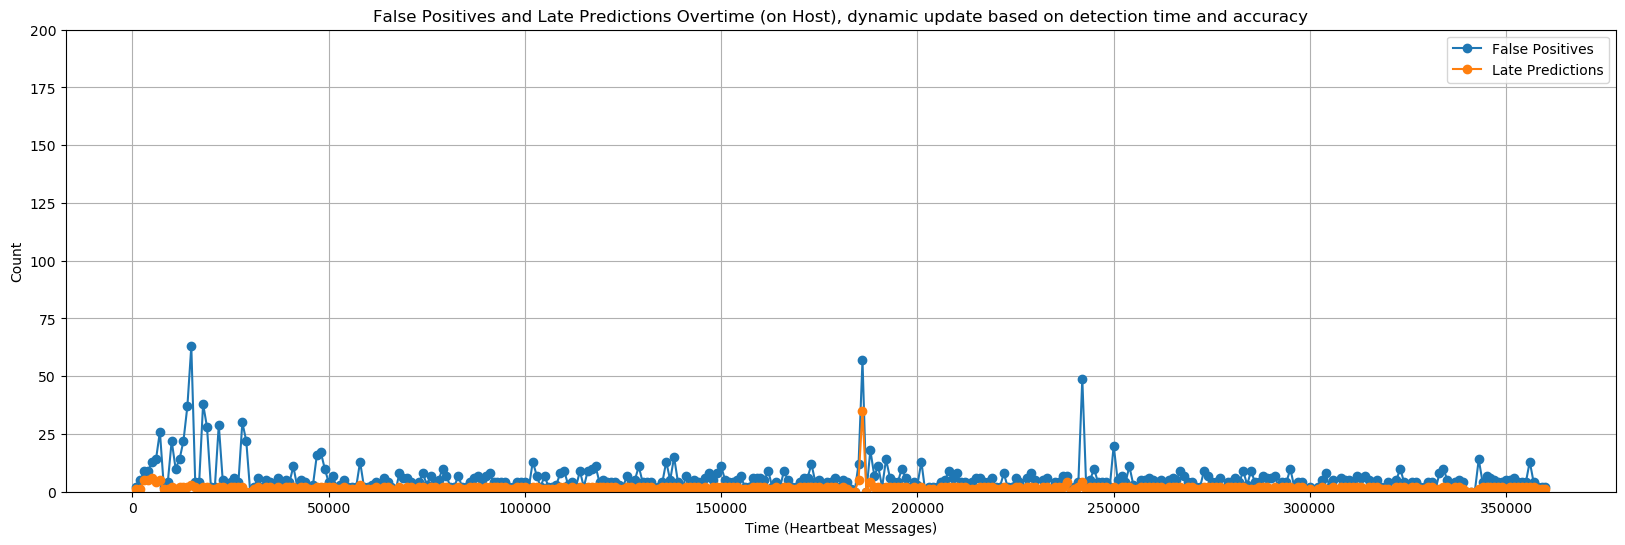

1.7305555555555556


In [2]:
# this is mlfd run on the host with simulations 

import matplotlib.pyplot as plt
import statistics
import numpy as np

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == 62:
                start_processing = True
                continue
            if marker_count > 62:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on Host), dynamic update based on detection time and accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    print(data)
    plot_line_chart(data)
    print(np.mean(data["late_predictions"]))


dpu false positive analysis

['*******************New Run*******************\n', 'false_positives: 106\n', 'late_predictions: 104\n', 'false_positives: 182\n', 'late_predictions: 174\n', 'false_positives: 127\n', 'late_predictions: 123\n', 'false_positives: 147\n', 'late_predictions: 140\n', 'false_positives: 129\n', 'late_predictions: 124\n', 'false_positives: 63\n', 'late_predictions: 61\n', 'false_positives: 25\n', 'late_predictions: 23\n', 'false_positives: 60\n', 'late_predictions: 56\n', 'false_positives: 37\n', 'late_predictions: 36\n', 'false_positives: 39\n', 'late_predictions: 38\n', 'false_positives: 49\n', 'late_predictions: 47\n', 'false_positives: 43\n', 'late_predictions: 41\n', 'false_positives: 16\n', 'late_predictions: 15\n', 'false_positives: 25\n', 'late_predictions: 23\n', 'false_positives: 58\n', 'late_predictions: 52\n', 'false_positives: 35\n', 'late_predictions: 34\n', 'false_positives: 58\n', 'late_predictions: 58\n', 'false_positives: 25\n', 'late_predictions: 24\n', 'false_positives: 47

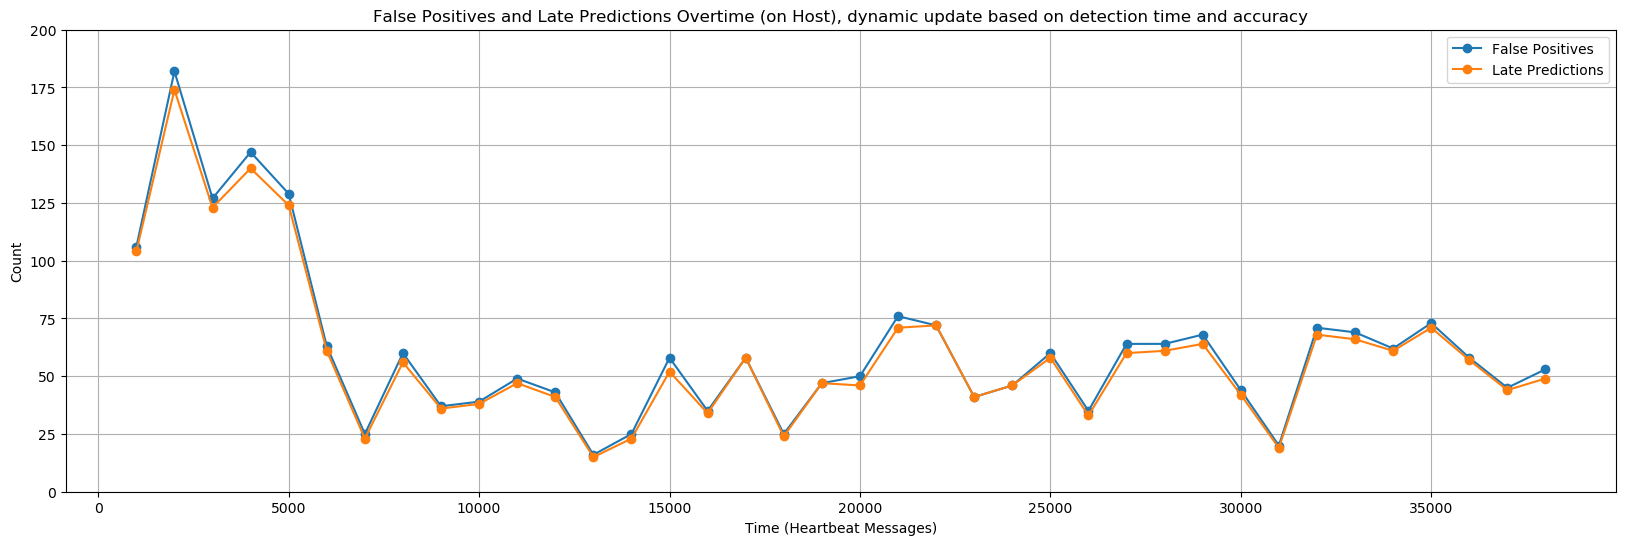

59.18421052631579


In [3]:
# this is mlfd run on the host with simulations 

import matplotlib.pyplot as plt
import statistics
import numpy as np

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip().startswith("*******************New Run*******************"):
            marker_count += 1
            if marker_count == 1:
                start_processing = True
                continue
            if marker_count > 1:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass
                
    print("Average False positives: ", statistics.mean(data["false_positives"]))

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(20, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (on Host), dynamic update based on detection time and accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 200)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    # plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "dpu_false_positive.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    print(lines)


    data = process_data_from_5th_run(lines)
    print(data)
    plot_line_chart(data)
    print(np.mean(data["late_predictions"]))
